In [1]:
import numpy as np                #for array manipulation
import pandas as pd               #data manipulation
from sklearn import preprocessing #scaling
import keras
from keras.layers import Dense    #for Dense layers
from keras.layers import BatchNormalization #for batch normalization
from keras.layers import Dropout            #for random dropout
from keras.models import Sequential #for sequential implementation
from keras.optimizers import Adam   #for adam optimizer
from keras import regularizers      #for l2 regularization
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
X = pd.read_csv('X.csv')
X=X.drop("TimeStamp",1)
Y = pd.read_csv('Y.csv')
Y=Y.drop("TimeStamp",1)

X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
XY = pd.concat([X, Y['DispFrames']], axis=1)
train, test = train_test_split(XY, test_size = 0.3)

train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

X_train = train[X_features]; X_test = test[X_features]
X_train_r=preprocessing.scale(X_train)
X_test_r =preprocessing.scale(X_test)
Y_train = train['DispFrames']; Y_test = test['DispFrames']

In [29]:
n_cols = 12
input_shape = (n_cols, )

In [8]:

# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(12, 
                    activation = activation,
                    input_shape = input_shape,
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dense(1, activation = activation))
# Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",)
#                  metrics=['mape','mse'])
    return model

In [95]:
# Create a KerasClassifier object
model = KerasRegressor(build_fn = create_model,
                       verbose = 1)
# Define the hyperparameter space
params = {'batch_size': [16], 
          'epochs': [40],
         'learning_rate': [0.01]}

params = {'batch_size': [16], 
          'epochs': [20, 40],
          'learning_rate': [0.01, 0.001]}

# Create a randomize search cv object 
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(5),
                                  scoring='neg_mean_absolute_error')
random_search_results = random_search.fit(X_train_r, Y_train)

print("Best Score: ", random_search_results.best_score_,
      "and Best Params: ", random_search_results.best_params_)
cv_results_df = pd.DataFrame(random_search_results.cv_results_)
cv_results_df.to_csv('gridsearch2.csv')
cv_results_df

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Epoch 1/20
2016/2016 [==============================] - 0s 70us/step - loss: 8.2476
Epoch 2/20
2016/2016 [==============================] - 0s 46us/step - loss: 2.2783
Epoch 3/20
2016/2016 [==============================] - 0s 48us/step - loss: 1.9431
Epoch 4/20
2016/2016 [==============================] - 0s 46us/step - loss: 1.8825
Epoch 5/20
2016/2016 [==============================] - 0s 45us/step - loss: 1.8499
Epoch 6/20
2016/2016 [==============================] - 0s 49us/step - loss: 1.8218
Epoch 7/20
2016/2016 [==============================] - 0s 57us/step - loss: 1.8026
Epoch 8/20
2016/2016 [==============================] - 0s 52us/step - loss: 1.7788
Epoch 9/20
2016/2016 [==============================] - 0s 51us/step - loss: 1.7804
Epoch 10/20
2016/2016 [==============================] - 0s 53us/step - loss: 1.7796
Epoch 11/20
2016/2016 [==============================] - 0s 48us/step - loss: 1.7538
Epoch 12/20
2016/2016 [==============================] - 0s 47us/step - lo

Epoch 8/20
2016/2016 [==============================] - 0s 43us/step - loss: 3.5389
Epoch 9/20
2016/2016 [==============================] - 0s 45us/step - loss: 3.2264
Epoch 10/20
2016/2016 [==============================] - 0s 43us/step - loss: 2.9706
Epoch 11/20
2016/2016 [==============================] - 0s 45us/step - loss: 2.7522
Epoch 12/20
2016/2016 [==============================] - 0s 45us/step - loss: 2.5561
Epoch 13/20
2016/2016 [==============================] - 0s 58us/step - loss: 2.3973
Epoch 14/20
2016/2016 [==============================] - 0s 48us/step - loss: 2.2742
Epoch 15/20
2016/2016 [==============================] - 0s 54us/step - loss: 2.1779
Epoch 16/20
2016/2016 [==============================] - 0s 46us/step - loss: 2.1089
Epoch 17/20
2016/2016 [==============================] - 0s 44us/step - loss: 2.0461
Epoch 18/20
2016/2016 [==============================] - 0s 53us/step - loss: 1.9959
Epoch 19/20
2016/2016 [==============================] - 0s 53us/st

2016/2016 [==============================] - 0s 49us/step - loss: 1.4697
Epoch 18/40
2016/2016 [==============================] - 0s 47us/step - loss: 1.4491
Epoch 19/40
2016/2016 [==============================] - 0s 47us/step - loss: 1.4611
Epoch 20/40
2016/2016 [==============================] - 0s 45us/step - loss: 1.4491
Epoch 21/40
2016/2016 [==============================] - 0s 49us/step - loss: 1.4344
Epoch 22/40
2016/2016 [==============================] - 0s 46us/step - loss: 1.4524
Epoch 23/40
2016/2016 [==============================] - 0s 46us/step - loss: 1.4206
Epoch 24/40
2016/2016 [==============================] - 0s 46us/step - loss: 1.4456
Epoch 25/40
2016/2016 [==============================] - 0s 47us/step - loss: 1.4248
Epoch 26/40
2016/2016 [==============================] - 0s 45us/step - loss: 1.4318
Epoch 27/40
2016/2016 [==============================] - 0s 44us/step - loss: 1.4129
Epoch 28/40
2016/2016 [==============================] - 0s 45us/step - loss:

2016/2016 [==============================] - 0s 47us/step - loss: 1.5687
Epoch 33/40
2016/2016 [==============================] - 0s 48us/step - loss: 1.5639
Epoch 34/40
2016/2016 [==============================] - 0s 49us/step - loss: 1.5545
Epoch 35/40
2016/2016 [==============================] - 0s 49us/step - loss: 1.5483
Epoch 36/40
2016/2016 [==============================] - 0s 46us/step - loss: 1.5432
Epoch 37/40
2016/2016 [==============================] - 0s 48us/step - loss: 1.5408
Epoch 38/40
2016/2016 [==============================] - 0s 47us/step - loss: 1.5351
Epoch 39/40
2016/2016 [==============================] - 0s 46us/step - loss: 1.5267
Epoch 40/40
504/504 [==============================] - 0s 31us/step
Epoch 1/40
2016/2016 [==============================] - 0s 81us/step - loss: 19.3414
Epoch 2/40
2016/2016 [==============================] - 0s 54us/step - loss: 16.3984
Epoch 3/40
2016/2016 [==============================] - 0s 56us/step - loss: 12.4165
Epoch 4/4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_epochs,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.556933,0.121268,0.038150,0.003037,0.01,20,16,"{'learning_rate': 0.01, 'epochs': 20, 'batch_s...",-1.097113,-2.178877,-1.780821,-1.920740,-1.841606,-1.763831,0.359926,1
1,2.734319,0.375520,0.043903,0.010532,0.001,20,16,"{'learning_rate': 0.001, 'epochs': 20, 'batch_...",-1.413039,-2.304840,-2.349936,-2.118756,-3.293871,-2.296088,0.601626,4
2,4.531667,0.184979,0.041551,0.001676,0.01,40,16,"{'learning_rate': 0.01, 'epochs': 40, 'batch_s...",-1.837989,-2.183512,-1.596721,-1.616902,-1.885990,-1.824223,0.213463,2
3,4.910916,0.358759,0.044751,0.003532,0.001,40,16,"{'learning_rate': 0.001, 'epochs': 40, 'batch_...",-1.311266,-2.159999,-1.714236,-1.917488,-2.311882,-1.882974,0.351346,3


In [30]:
def create_model(k_reg=regularizers.l1(0.05),learning_rate=0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(12, 
                    activation = activation,
                    input_shape = input_shape,
                    kernel_regularizer = k_reg))
    model.add(Dense(6,
                    activation = activation, 
                    kernel_regularizer = regularizers.l1(0.05)))
    model.add(Dense(12,
                    activation = activation, 
                    kernel_regularizer = regularizers.l1(0.05)))
    model.add(Dense(1, activation = activation))
# Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",)
#                  metrics=['mape','mse'])
    return model

# Create a KerasClassifier object
model = KerasRegressor(build_fn = create_model,
                       verbose = 0)
# Define the hyperparameter space

params = {'batch_size': [16], 
          'epochs': [40],
          'learning_rate': [0.01],
         }

# Create a randomize search cv object 
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(5),
                                  scoring='neg_mean_absolute_error')
random_search_results = random_search.fit(X_train_r, Y_train)

score.append(random_search_results.best_score_)
print("Best Score: ", random_search_results.best_score_,
      "and Best Params: ", random_search_results.best_params_)

KeyboardInterrupt: 

2520

In [31]:

def create_model():
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=0.01)
    activation='relu'
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(12, 
                    activation = activation,
                    input_shape = input_shape,
                    kernel_regularizer = regularizers.l1(0.05)))
    model.add(Dense(6,
                    activation = activation, 
                    kernel_regularizer = regularizers.l1(0.05)))
    model.add(Dense(1, activation = activation))
# Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",)
#                  metrics=['mape','mse'])
    return model

#Create a KerasClassifier
model = KerasRegressor(build_fn = create_model,
                       epochs = 40, 
                       batch_size = 16,
                       verbose = 0)
model.fit(X_train_r,Y_train)
Y_pred = model.predict(X_test_r)
naive_est=np.mean(Y_train)
naive=np.linspace(1,Y_test.shape[0],Y_test.shape[0])
for i in range(Y_test.shape[0]):
    naive[i]=naive_est
    
NMAE = np.mean(np.abs(Y_pred - Y_test))/np.mean(Y_test)
NMAE_n = np.mean(np.abs(naive_est - Y_test))/np.mean(Y_test)
print("Normalized Mean Absolute Error (NMAE) of the linear model is %.3f" %NMAE)
print("Normalized Mean Absolute Error (NMAE) of the naive estimation %.2f" %NMAE_n)

Normalized Mean Absolute Error (NMAE) of the linear model is 0.075
Normalized Mean Absolute Error (NMAE) of the naive estimation 0.23


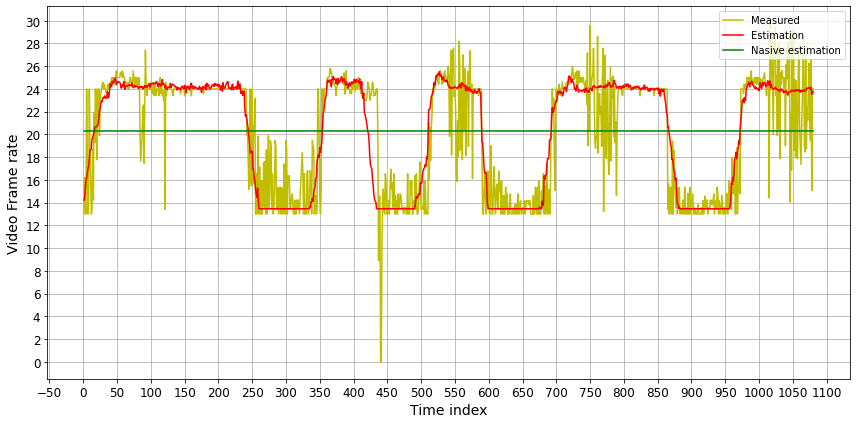

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Produce the plots for specified features sets
index=np.linspace(1,Y_test.shape[0],Y_test.shape[0])
plt.plot(index, Y_test,  color='y')
plt.plot(index, Y_pred, color='r')
plt.plot(index, naive,  color='g')
#plt.plot(Y_test,  color='y')
#plt.plot(regr.predict(X_test), color='r')
x_major_locator=MultipleLocator(50)
y_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 14
plt.xlabel('Time index', fontsize=font_size)
plt.ylabel('Video Frame rate', fontsize=font_size)
plt.legend(('Measured','Estimation','Nasive estimation'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\5.4.png",dpi=300)
plt.show()

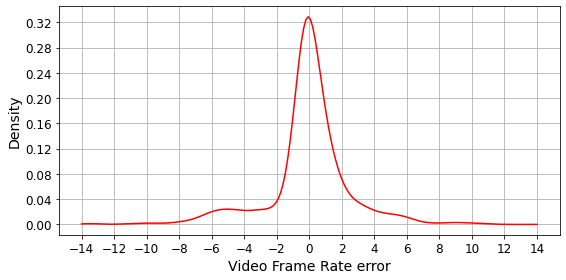

In [35]:
error = Y_test-Y_pred
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

error.plot.kde(ax=axes,ind=np.linspace(-14,14,200),color='r');
font_size = 14
axes.set_xlabel('Video Frame Rate error', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(0.04)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
plt.savefig(r"\kth course\network analytics\project\pic\5.5.png",dpi=300)
plt.show()